# Telecom Churn Prediction Using Logistic Regression

## Importing Module Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Accessing .csv file raw data

In [2]:
telecom_data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
telecom_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telecom_data.shape #to check shape of data i.e nmber of records and columns

(7043, 21)

In [5]:
telecom_data.columns.values #to check columns in the dataset

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telecom_data.dtypes #to check the data types

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data inspection

In [7]:
telecom_data.describe() #to check statistics part of the dataset

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
telecom_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
tshape = telecom_data.shape
print(f"\nThere are {tshape[0]} rows and {tshape[1]} columns in the Telecom Industry Dataset\n")


There are 7043 rows and 21 columns in the Telecom Industry Dataset



## Data Cleaning

In [12]:
# Checkking Null Values
telecom_data.isnull().sum()*100/telecom_data.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [13]:
print("\nTotal Charges\n")
telecom_data.TotalCharges.describe()


Total Charges



count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [14]:
telecom_data.TotalCharges = telecom_data.TotalCharges.replace(' ',np.nan)
telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges)

In [16]:
telecom_data.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [17]:
val = (telecom_data.TotalCharges/telecom_data.MonthlyCharges).median() * telecom_data.MonthlyCharges

In [18]:
telecom_data.TotalCharges = val.where(telecom_data.MonthlyCharges == np.nan,other=telecom_data.TotalCharges)

In [19]:
telecom_data.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [20]:
telecom_data.describe().style.background_gradient(cmap = "copper")

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
telecom_data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174



## Exploratory Data Analysis

 <b>Churn (target variable)

In [22]:
telecom_data.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [23]:
telecom_data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [24]:
telecom_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [25]:
telecom_data.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

Inference: From the above analysis we can conclude that.

In the above output, we can see that our dataset is not balanced at all i.e. Yes is 1869 around and No is 5174 around
So we analyze the data with other features while taking the target values separately to get some insights.

### <b> Setting Seaborn Environment

In [27]:
sns.set()

C:\Users\roshm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


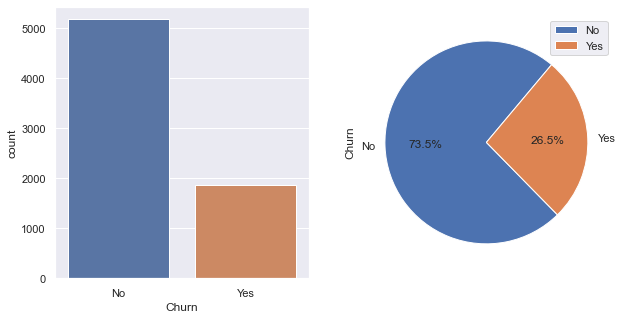

In [28]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
plt1 = sns.countplot(telecom_data['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(telecom_data['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (10,5), startangle= 50, ax = axs[1])

plt.gca().set_aspect('equal')

plt.show()

We can see from the pie chart on the right, about 27% of the Telcom customers from our dataset end up churning. 



### <b> Data Cleaning

In [29]:

# Removing missing values
telecom_data.dropna(inplace=True)

# Removing Customer Ids from Dataset
df1 = telecom_data.iloc[:,1:]

# Converting the Yes and No values into 1 and 0
df1["Churn"].replace(to_replace='Yes',value=1,inplace=True)
df1["Churn"].replace(to_replace='No',value=0,inplace=True)

In [30]:
# Converting all the analytical frames into dummy data set

df1_dummy = pd.get_dummies(df1)
df1_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# .# Visualization of 'Churn' with other variables

<AxesSubplot:>

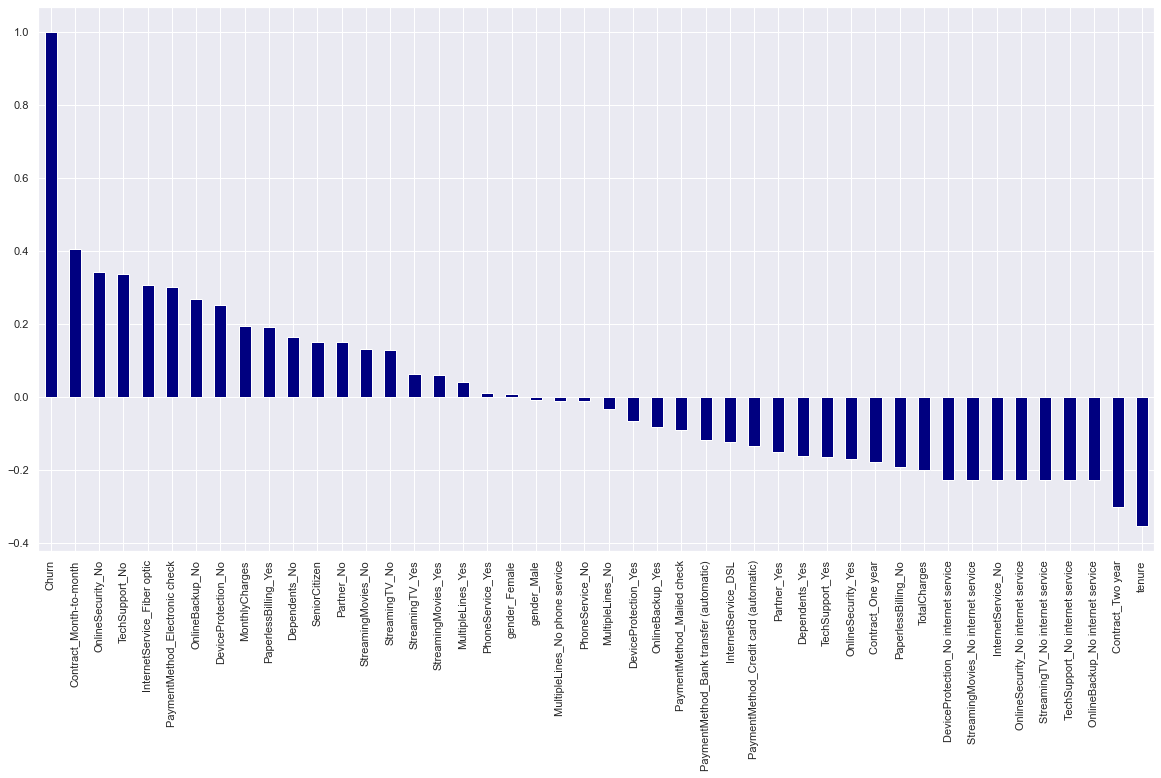

In [32]:
#Get Correlation of "Churn" with other variables:
sns.set()
plt.figure(figsize=(15,8))
df1_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',figsize = (20, 10), color = 'Navy')


## Logistic regression

In [33]:
# We will use the data frame where we had created dummy variables
X = df1_dummy.drop(columns = ['Churn'])
y = df1_dummy['Churn'].values


# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

### Train Test Split

In [79]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Building the Model

In [80]:
# Running logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
print(f"\nModel type : ",model,end="\n\n")


Model type :  LogisticRegression()



In [81]:
# Generate model prediction data for train and test sets
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

#### How many times was the classifier correct on the training set?

In [82]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    3949
1     973
dtype: int64
----------------------------------
0    0.802316
1    0.197684
dtype: float64


Train Set Results:
3949 Correct (973 Incorrect)
80.23% Accuracy

In [83]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1704
1     406
dtype: int64
---------------------------------
0    0.807583
1    0.192417
dtype: float64


Train Set Results:
1704 Correct (406 Incorrect)
80.75 % Accuracy

In [84]:
print("\n\ny Train\n")
y_train



y Train



array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [85]:
print("\n\ny Test\n")
y_test



y Test



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
print("\nCoefficient of Model\n")
model.coef_


Coefficient of Model



array([[ 0.27196204, -2.89018875, -0.22684727,  0.92505208,  0.01083979,
        -0.01245434,  0.01507257, -0.01668711,  0.05885141, -0.06046595,
         0.09619972, -0.09781426, -0.16025164,  0.09619972,  0.06243738,
        -0.42291654,  0.53384179, -0.1125398 ,  0.24068014, -0.1125398 ,
        -0.12975488,  0.10136144, -0.1125398 ,  0.00956382,  0.07520261,
        -0.1125398 ,  0.03572264,  0.24372955, -0.1125398 , -0.13280429,
        -0.11478968, -0.1125398 ,  0.22571494, -0.04058994, -0.1125398 ,
         0.15151519,  0.75306092, -0.02563551, -0.72903995, -0.13608093,
         0.13446639, -0.05154744, -0.12481776,  0.25043212, -0.07568146]])

In [87]:
print("\nIntercept of Model\n")
model.intercept_


Intercept of Model



array([-1.01808582])

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
from sklearn import metrics
prediction_test = result.predict(X_test)

# Print the prediction accuracy

print (f"\n\nMetrics Accuracy Score :- {metrics.accuracy_score(y_test, prediction_test)}\n")



Metrics Accuracy Score :- 0.8075829383886256



In [90]:
prediction_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
print("\nMean Absolute Error :-",mean_absolute_error(y_test,prediction_test))


Mean Absolute Error :- 0.1924170616113744


In [92]:
print("\nMean Squared Error :-",np.sqrt(mean_squared_error(y_test,prediction_test)))


Mean Squared Error :- 0.43865369212098787


In [93]:
print("\nR2 Score error :-",r2_score(y_test,prediction_test))


R2 Score error :- -0.02299976116551239


In [94]:
from sklearn.metrics import classification_report
print("\nClassification Report between y test and prediction\n\n")
print(classification_report(y_test,prediction_test))


Classification Report between y test and prediction


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



AxesSubplot(0.125,0.125;0.775x0.755)


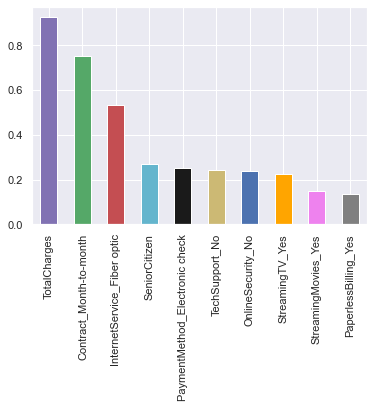

In [95]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar',color=['m','g','r','c','k','y','b','orange','violet','grey']))

AxesSubplot(0.125,0.125;0.775x0.755)


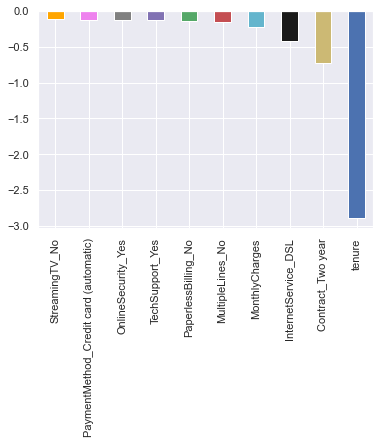

In [96]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar',color=['orange','violet','grey','m','g','r','c','k','y','b']))
